## Particle within radius or overlap calculations

In [2]:
#user-defined
# import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist


#plots
import pylab as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns

#misc
import time
np.set_printoptions(suppress=True)

In [49]:
dir_save = '../../data/Sprints/AN/'
dir ='~/Documents/MyFiles/DataAnalysis/data/Sprints/Run03/Set05/wind05Run03_InterpolatedX.hdf'
# dir1 = '~/Documents/MyFiles/DataAnalysis/data/Sprints/Run02/'
# run01='Run01_expected_full.hdf'
# run02='Run02_expected_full.hdf'
# run01='Run01.h5'
# df1=pd.read_hdf(dir+run01)
# df2=pd.read_hdf(dir1+run02)

### Calculate Expected encounters

In [50]:
df = pd.DataFrame()
df = pd.read_hdf(dir)
dt= df.master_time[1]-df.master_time[0]

In [51]:
# sync_time = df.master_time-df.master_time[0]
# df.insert(1,'sync_time',sync_time)

In [52]:
# storing the odor location in a numpy array to avoid reading pandas
odor_position = np.array([[df.xsrc[i],df.ysrc[i]] for i in range (len(df.xsrc))]) 
source = np.array([[0,0]])
distance_from_source = np.array([cdist(odor_position,source)]).flatten()

### Finding Intersection area

In [ ]:
t1 = 'sync_time>=0 & sync_time<60'
d1=pd.DataFrame()
d1 = df.query(t1)

t2= 'sync_time>=60 & sync_time<120'
d2=pd.DataFrame()
d2 = df.query(t2)

t3= 'sync_time>=120 & sync_time<180'
d3=pd.DataFrame()
d3 = df.query(t3)

t4 = 'sync_time>=180 & sync_time<240'
d4=pd.DataFrame()
d4 = df.query(t4)

t5 = 'sync_time>=240 & sync_time<300'
d5=pd.DataFrame()
d5 = df.query(t5)

e1 = [np.sum(df.U[j:])*dt for j in range(d1.index[0],d1.index[-1])]
n1 = [np.sum(df.V[j:])*dt for j in range(d1.index[0],d1.index[-1])]

e2 = [np.sum(df.U[j:])*dt for j in range(d2.index[0],d2.index[-1])]
n2 = [np.sum(df.V[j:])*dt for j in range(d2.index[0],d2.index[-1])]

e3 = [np.sum(df.U[j:])*dt for j in range(d3.index[0],d3.index[-1])]
n3 = [np.sum(df.V[j:])*dt for j in range(d3.index[0],d3.index[-1])]

e4 = [np.sum(df.U[j:])*dt for j in range(d4.index[0],d4.index[-1])]
n4 = [np.sum(df.V[j:])*dt for j in range(d4.index[0],d4.index[-1])]

e5 = [np.sum(df.U[j:])*dt for j in range(d5.index[0],d5.index[-1])]
n5 = [np.sum(df.V[j:])*dt for j in range(d5.index[0],d5.index[-1])]

In [78]:
from scipy.spatial import cKDTree

# Assuming a default tolerance value of 1 here
def intersect_close(a, b, tol=0.05):
    # Get closest distances for each pt in b
    dist, index = cKDTree(a).query(b, k=1) # k=1 selects closest one neighbor

    # Check the distances against the given tolerance value and 
    # thus filter out rows off b for the final output
    return b[dist <= tol], index

In [80]:
c1 = np.column_stack((e1, n1))
c2 = np.column_stack((e2, n2))
test,index = intersect_close(c1,c2)
print(test)
a,b=zip(*test)

In [83]:
itemindex1 = np.where(np.isclose(e1, -182.85755155, atol=0.05))
itemindex2 = np.where(np.isclose(e2, -182.84417644, atol=0.05))
up1 = np.where(np.isclose(n1, 381.39412315, atol=0.05))
up2 = np.where(np.isclose(n2, 381.37677077, atol=0.05))

array([[-182.85755155,  381.39412315],
       [-182.85084279,  381.38545944],
       [-182.84417644,  381.37677077]])

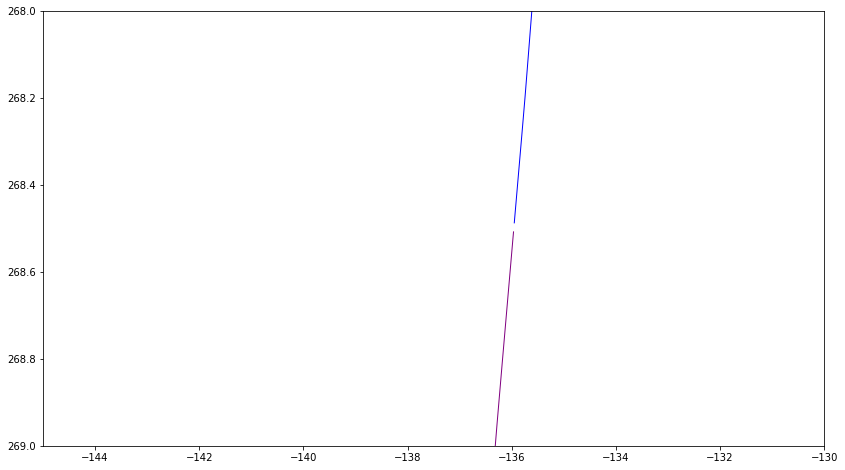

In [155]:
f= plt.figure(figsize=(14,8))
plt.xlim(-145,-130)
plt.ylim(269,268)
# n=-1
plt.plot(e1,n1, color='red', linewidth=1)
plt.plot(e2,n2, color='purple', linewidth=1)
# plt.plot(a,b, marker='+', linewidth=1)
plt.plot(e3,n3, color='blue',  linewidth=1)
plt.plot(e4,n4, color='orange',  linewidth=1)
plt.plot(e5,n5, color='green', linewidth=1)

### Is Encountered odor particle within the Calculated particle radius?

The loop below computes locations of the eastwest and northsouth particles and compares with a radius (distance) to interpret if the encountered particle were close to calculated particle. The execution for the loop is 23.56 seconds for 59770 rows of data

For stationery wind sensor: The loop below takes in ith eastwest and subtracts the ith U and V elements to get the i-1 state, as the eastwest is summation of all the wind positions. 

[3 + 2 + 1] = [6]

hence ith _state = 6

_state = _state-3

_state = _state-2

In [67]:
eastwest[-10:]

[-0.06036108736185387,
 -0.054044206117597006,
 -0.04778971876402271,
 -0.04159762530113095,
 -0.03546792572892174,
 -0.029400620047395076,
 -0.023395708256550966,
 -0.0174531903563894,
 -0.011573066346910386,
 -0.005755336228113918]

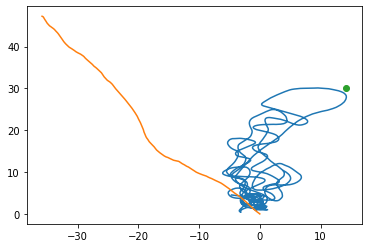

In [73]:
plt.plot(df.xsrc, df.ysrc)
plt.plot(eastwest[-6000:],northsouth[-6000:])
plt.plot(14.26531238518209, 30.115240559630987, marker='o', linewidth=15)

In [ ]:
14.26531238518209

30.115240559630987

In [74]:
#summation till Nth particle
eastwest = [np.sum(df.U[j:])*dt for j in range(0,5000) ]
# northsouth = [np.sum(df.V[j:])*dt for j in range(0,len(df))]

In [7]:
odor_presence=[]
min_distance = []
max_radius = []

#for(upper, lower, step)
for i in range((len(eastwest))-1, -1, -1):
    
    odor_pos = [odor_position[i]]  
    if(i == 0):
        radius = np.zeros(1)
        wind_pos = np.array([[0,0]])
        max_radius.append(0)
    else:
        eastwest = np.resize(np.array([eastwest-df.U[i]*dt]),(1,i)).flatten() # resize needed to avoid negative data
        northsouth = np.resize(np.array([northsouth-df.V[i]*dt]),(1,i)).flatten()
        wind_pos = np.vstack([eastwest,northsouth]).T   
        radius = np.arange(start = i, stop = 0, step = -1)**0.5*0.01
        max_radius.append(i**0.5*0.1)
    #TODO: Model better radius
    #max_radius= np.max(radius)
    distance = cdist(odor_pos,wind_pos).flatten()   # cdist compares distance for all the points in both arrays
    min_distance.append(np.min(distance))
    #distance = distance[distance(distance<max_radius)]     #this step can reduce computation but arises issues 
                                                           #for different length arrays for distance and radius
    
    #TODO: Find a way to reduce distance array size and compare without increasing the overall execution time
    
    ## NOTE : COMPARING EVERY DISTANCE TO THE CORRESPONDING RADIUS TO SEE IF THE DISTANCE IS LESSER THAN 
    ## THE RADIUS WHICH WOULD MEAN THE PARTICLES MATCH. IF NOT THEN THEY DON'T MATCH FOR TIME T.
    
    ## comparing element to element, i.e. radius to corresponding distance
    x = np.any(distance<=radius)             # generates a boolean values 
    if x==True:
        odor_presence.append(1)
    else:
        odor_presence.append(0)

In [8]:
## flip containers because above iteration is done in reverse order
# _mock=np.zeros(len(df))
df['mock'] = np.zeros(len(df))
min_distance = np.array(np.flip(min_distance)) 
odor_presence = odor_presence[::-1]
max_radius = max_radius[::-1]
## storing in the dataframe 
df['odor_expected'] = odor_presence
df['odor_from_wind'] = distance_from_source
df['odor_from_source'] = min_distance
df['radius'] = max_radius

# sensor_direction = np.array(np.arctan2(df.gps_linear_y,df.gps_linear_x)* 180 / np.pi)
# df['relative_motion']=sensor_direction - df.D

In [210]:
# df.to_hdf(dir+'Run05Coll0'+str(collection_number)+'_expected_full.hdf', key='df', mode='w')
# df.to_hdf(dir+'wind0'+str(set_number)+'Run03_Expected_Small.hdf', key='df', mode='w')

## Visualization

In [46]:
query = 'odor>=2'
df1_occurence = df1.query(query)
query1='odor<2'
df1_no_occurence = df1.query(query1)


x = np.linspace(0,35,12)
y = np.linspace(0,18,10)
H1, x, y = np.histogram2d(df1.odor_from_source, df1.odor_from_wind, bins=(x, y))
H1 = H1.T 
# plt.imshow(H, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])

H2, x, y = np.histogram2d(df1_occurence.odor_from_source, df1_occurence.odor_from_wind, bins=(x, y))
H2 = H2.T 

H3, x, y = np.histogram2d(df1_no_occurence.odor_from_source, df1_no_occurence.odor_from_wind, bins=(x, y))
H3 = H3.T

query2 = 'odor>=2'
df2_occurence = df2.query(query2)
query3='odor<2'
df2_no_occurence = df2.query(query3)


x = np.linspace(0,35,12)
y = np.linspace(0,18,10)
H4, x, y = np.histogram2d(df2.odor_from_source, df2.odor_from_wind, bins=(x, y))
H4 = H4.T 
# plt.imshow(H, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])

H5, x, y = np.histogram2d(df2_occurence.odor_from_source, df2_occurence.odor_from_wind, bins=(x, y))
H5 = H5.T 

H6, x, y = np.histogram2d(df2_no_occurence.odor_from_source, df2_no_occurence.odor_from_wind, bins=(x, y))
H6 = H6.T

Encounters = np.array(H2+H5)/np.array(H1+H4)
Encounters[Encounters == np.inf] = 0

No_Encounters = np.array(H3+H6)/np.array(H1+H4)
No_Encounters[No_Encounters == np.inf] = 0

<ipython-input-46-a41b230a0dfd>:37: RuntimeWarning: invalid value encountered in true_divide
  Encounters = np.array(H2+H5)/np.array(H1+H4)
<ipython-input-46-a41b230a0dfd>:40: RuntimeWarning: invalid value encountered in true_divide
  No_Encounters = np.array(H3+H6)/np.array(H1+H4)


In [47]:
Total = H1+H4
N_Encounter = H2+H5

## removing areas less than 1000 deno

for i in range (len(Total)):
    for j in range(len(Total[i])):
        if Total[i][j]<1000:
            Total[i][j] =0
            N_Encounter[i][j]=0

E = np.array(N_Encounter)/np.array(Total)
E[E == np.inf] = 0

<ipython-input-47-5e9163d64325>:12: RuntimeWarning: invalid value encountered in true_divide
  E = np.array(N_Encounter)/np.array(Total)


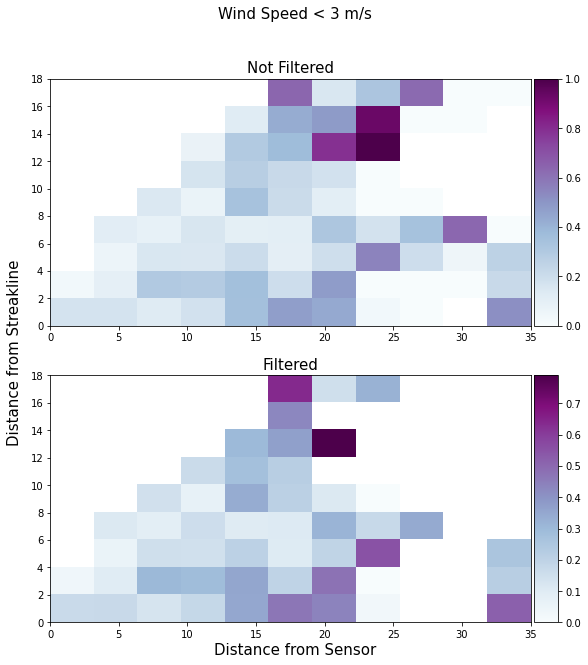

In [48]:
f, (ax1,ax2) = plt.subplots(2,1, figsize =(10,10) , gridspec_kw={'height_ratios': [4,4]})
f.suptitle('Wind Speed < 3 m/s', fontsize = 15)
var = ax1.imshow(Encounters, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])
ax1.set_title('Not Filtered', fontsize = 15)
start, end = ax1.get_xlim()
divider = make_axes_locatable(ax1)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var, cax=cax0, orientation = 'vertical')

var2 = ax2.imshow(E, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])
ax2.set_title('Filtered', fontsize = 15)
start, end = ax2.get_xlim()
divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var2, cax=cax1, orientation = 'vertical')
f.text(0.5, 0.08, 'Distance from Sensor', ha='center', fontsize = 15) 
f.text(0.1, 0.5, 'Distance from Streakline', fontsize = 15, va='center', rotation='vertical')

f.savefig(dir_save+'ProbDistNonWindy.jpeg')

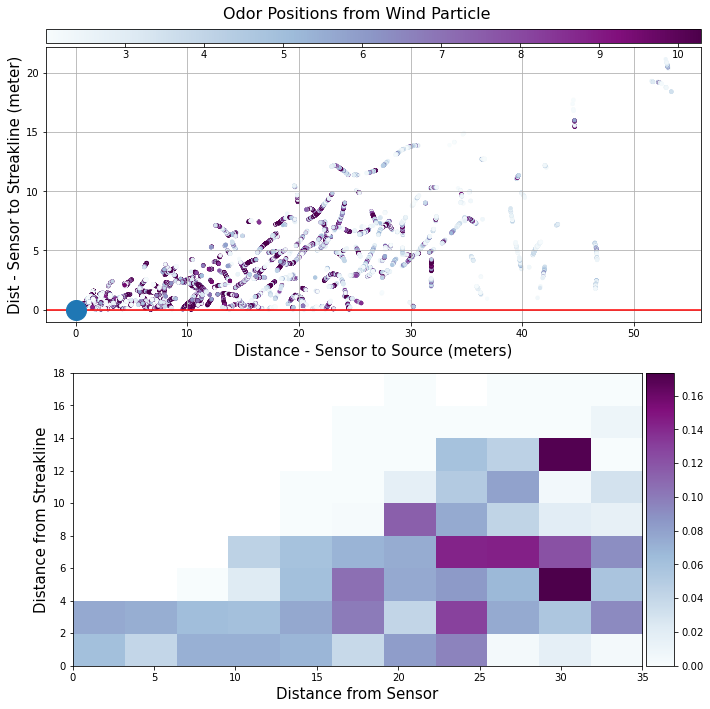

In [168]:
f, (ax1,ax2) = plt.subplots(2,1, figsize =(10,10) , gridspec_kw={'height_ratios': [4,4]})

#plot wind vs odor from source and each other
f.suptitle('Odor Positions from Wind Particle', fontsize = 16)
# ax1 = plt.axes(xlim =(0,35), ylim=(-5,28))
ax1.axhline(0, color = 'red')
ax1.plot(0,0,'o', markersize = 20)
var = ax1.scatter(df1_occurence.odor_from_source, df1_occurence.odor_from_wind, cmap = 'BuPu', c = df1_occurence.odor,  s = 10)
ax1.set_xlabel('Distance - Sensor to Source (meters)' , fontsize = 15)
ax1.set_ylabel('Dist - Sensor to Streakline (meter)' , fontsize = 15)

ax1.grid()

divider = make_axes_locatable(ax1)
cax = divider.append_axes('top', size='5%', pad=0.05)
f.colorbar(var, cax=cax, orientation = 'horizontal')

x = np.linspace(0,35,12)
y = np.linspace(0,18,10)
# H, x, y = np.histogram2d(df_occurence.odor_from_source, df_occurence.odor_from_wind, bins=(x, y))
# H = H.T 
# ax = plt.axes (xlim=(0,60), ylim=(0,60))
# ax2.set_title('Windy', fontsize = 16)
ax2.set_xlabel('Distance from Sensor', fontsize = 15)
ax2.set_ylabel('Distance from Streakline', fontsize = 15)
var2 = ax2.imshow(Encounters, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])
start, end = ax2.get_xlim()
# ax2.yaxis.set_ticks(np.arange(start, end, 1))
# ax2.xaxis.set_ticks(np.arange(start, end, 2.75))


# ax2.grid()


# x_vals = np.array(ax2.get_xlim())
# print(ax2.get_xlim())
# y_vals = 0.6292134831460674 * x_vals
# ax2.plot(x_vals, y_vals, '--')
# ax2.axhline(0, color = 'yellow', linestyle='--')
# y1 = 0.3146067415730337 * x_vals   
# # y = 0.20194102x+4
# ax2.plot(x_vals,y1, '--')
# ax2.axvline(22.25, color = 'red', linestyle='--')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var2, cax=cax, orientation = 'vertical')

f.tight_layout()

In [169]:


# Encounters = np.array(H2)/np.array(H1)
# Encounters[Encounters == np.inf] = 0

# No_Encounters = np.array(H3)/np.array(H1)
# No_Encounters[No_Encounters == np.inf] = 0

<ipython-input-169-1025cef6e2b3>:19: RuntimeWarning: invalid value encountered in true_divide
  Encounters = np.array(H2)/np.array(H1)
<ipython-input-169-1025cef6e2b3>:22: RuntimeWarning: invalid value encountered in true_divide
  No_Encounters = np.array(H3)/np.array(H1)


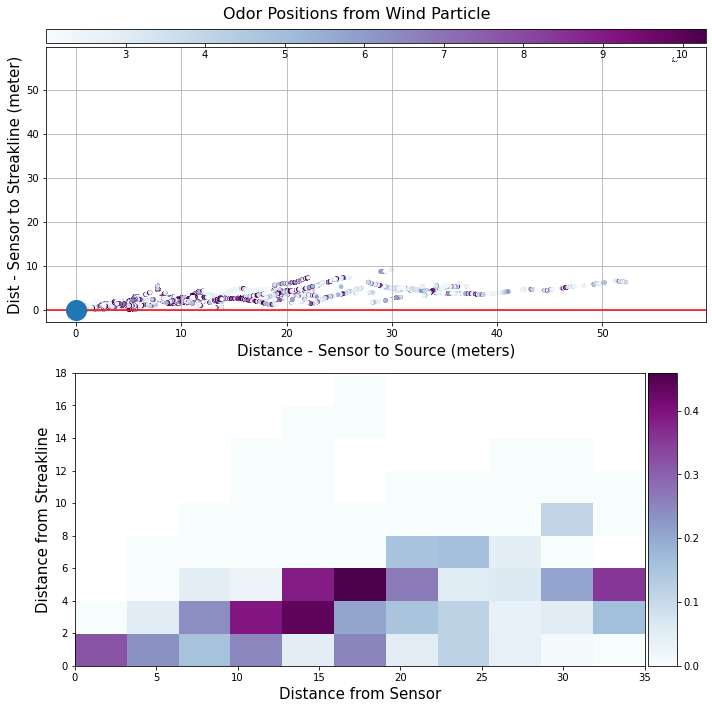

In [170]:
f, (ax1,ax2) = plt.subplots(2,1, figsize =(10,10) , gridspec_kw={'height_ratios': [4,4]})

#plot wind vs odor from source and each other
f.suptitle('Odor Positions from Wind Particle', fontsize = 16)
# ax1 = plt.axes(xlim =(0,35), ylim=(-5,28))
ax1.axhline(0, color = 'red')
ax1.plot(0,0,'o', markersize = 20)
var = ax1.scatter(df2_occurence.odor_from_source, df2_occurence.odor_from_wind, cmap = 'BuPu', c = df2_occurence.odor,  s = 10)
ax1.set_xlabel('Distance - Sensor to Source (meters)' , fontsize = 15)
ax1.set_ylabel('Dist - Sensor to Streakline (meter)' , fontsize = 15)

ax1.grid()

divider = make_axes_locatable(ax1)
cax = divider.append_axes('top', size='5%', pad=0.05)
f.colorbar(var, cax=cax, orientation = 'horizontal')

x = np.linspace(0,35,12)
y = np.linspace(0,18,10)
# H, x, y = np.histogram2d(df_occurence.odor_from_source, df_occurence.odor_from_wind, bins=(x, y))
# H = H.T 
# ax = plt.axes (xlim=(0,60), ylim=(0,60))
# ax2.set_title('Windy', fontsize = 16)
ax2.set_xlabel('Distance from Sensor', fontsize = 15)
ax2.set_ylabel('Distance from Streakline', fontsize = 15)
var2 = ax2.imshow(Encounters, interpolation='nearest', origin='lower',cmap = 'BuPu', extent=[x[0], x[-1], y[0], y[-1]])
start, end = ax2.get_xlim()
# ax2.yaxis.set_ticks(np.arange(start, end, 1))
# ax2.xaxis.set_ticks(np.arange(start, end, 2.75))


# ax2.grid()


# x_vals = np.array(ax2.get_xlim())
# print(ax2.get_xlim())
# y_vals = 0.6292134831460674 * x_vals
# ax2.plot(x_vals, y_vals, '--')
# ax2.axhline(0, color = 'yellow', linestyle='--')
# y1 = 0.3146067415730337 * x_vals   
# # y = 0.20194102x+4
# ax2.plot(x_vals,y1, '--')
# ax2.axvline(22.25, color = 'red', linestyle='--')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var2, cax=cax, orientation = 'vertical')

f.tight_layout()

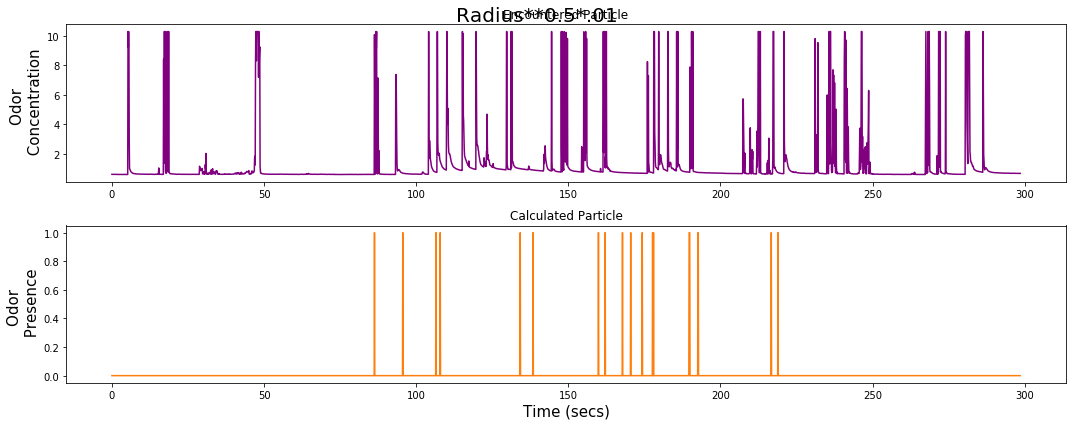

In [12]:
f, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,6))
# ax1.set_prop_cycle('color',[plt.cm.OrRd(i) for i in df.odor])

# ax1.set_facecolor('black')
ax1.plot(df.sync_time, df.odor, color='Purple')
ax1.set_ylabel('Odor \n Concentration', fontsize=15)
ax1.title.set_text('Encountered Particle')
ax2.plot(df.sync_time,df.odor_expected, color='C1')
ax2.set_xlabel('Time (secs)', fontsize=15)
ax2.set_ylabel('Odor \n Presence', fontsize=15)
ax2.title.set_text('Calculated Particle')

f.suptitle('Radius**0.5*.01', fontsize =20)
f.tight_layout()
#f.savefig(dir_save+'Coll0'+str(collection_number)+'_encounteredVsExpected.jpeg')

### Plotting 2d version of the video animation

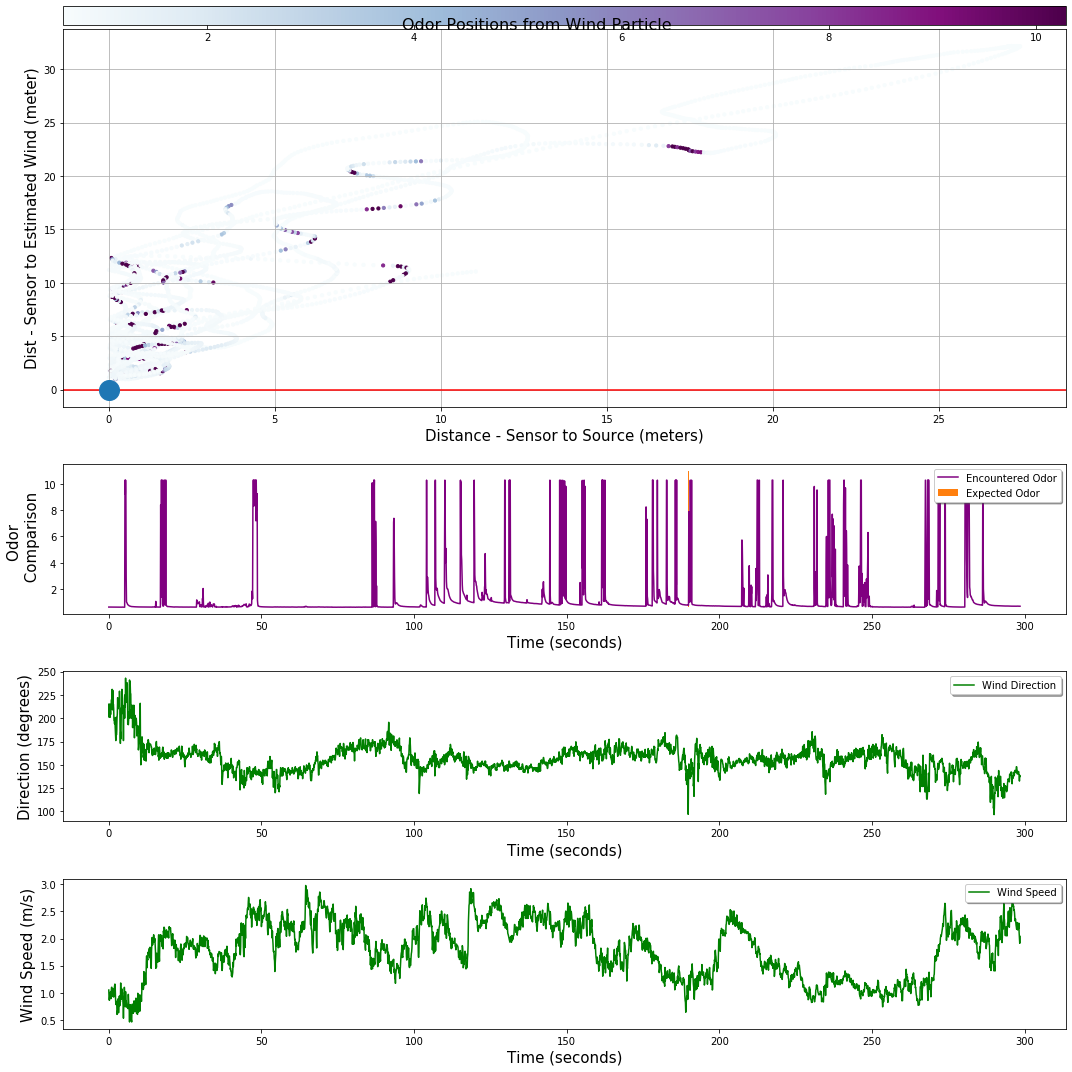

In [10]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,15) , gridspec_kw={'height_ratios': [8,3,3,3]})

#plot wind vs odor from source and each other
f.suptitle('Odor Positions from Wind Particle', fontsize = 16)
# ax1 = plt.axes(xlim =(0,35), ylim=(-5,28))
ax1.axhline(0, color = 'red')
ax1.plot(0,0,'o', markersize = 20)
# area = df.radius**2*0.4*m.pi #area
# ax1.scatter(area[0:30]**2,df.mock[0:30])
# ax1.scatter(df.sync_time[::300], df.mock[::300],  facecolors='none', edgecolors='b', s = area[::300])
var = ax1.scatter(df.odor_from_source, df.odor_from_wind, cmap = 'BuPu', c = df.odor,  s = 10)
ax1.set_xlabel('Distance - Sensor to Source (meters)' , fontsize = 15)
ax1.set_ylabel('Dist - Sensor to Estimated Wind (meter)' , fontsize = 15)
ax1.grid()

divider = make_axes_locatable(ax1)
cax = divider.append_axes('top', size='5%', pad=0.05)
f.colorbar(var, cax=cax, orientation = 'horizontal')

#plot concentration
ax2.plot(df.sync_time,df.odor,color='Purple' , label="Encountered Odor")
ax2.fill_between(df.sync_time, df.odor.min(), 11,where=df.odor_expected>0 ,facecolor='C1', alpha=1, label="Expected Odor")
# ax2.plot(df.sync_time, df.odor_expected, label="Expected Odor")
ax2.set_xlabel('Time (seconds)' , fontsize = 15)
ax2.set_ylabel('Odor \n Comparison' , fontsize = 15)
# ax2.set_facecolor('black')

lgd=ax2.legend(loc='upper right',fancybox=True, shadow=True)

## plot direction
ax3.plot(df.sync_time,df.D, color = 'green', label="Wind Direction")
# ax3.plot(df.sync_time,sensor_direction, color = 'purple', label="Sensor Direction")
ax3.set_xlabel('Time (seconds)' , fontsize = 15)
ax3.set_ylabel('Direction (degrees)' , fontsize = 15)
# ax3.axhline(150, color = 'red')
lgd=ax3.legend(loc='upper right',fancybox=True, shadow=True)



## plot speed
ax4.plot(df.sync_time,df.S2, color = 'green', label="Wind Speed")
ax4.set_xlabel('Time (seconds)' , fontsize = 15)
ax4.set_ylabel('Wind Speed (m/s)' , fontsize = 15)
lgd=ax4.legend(loc='upper right',fancybox=True, shadow=True)
# ax4.axhline(1.0, color = 'red')

f.tight_layout()


# f.savefig(dir_save+'Coll0'+str(collection_number)+'_plot_full.jpeg')